## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("data/Data.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1]

In [3]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [4]:
print(y)

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object


## Taking care of missing data

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])

In [6]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding Independent Variable

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [0])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [8]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding Dependent Variable

In [9]:
# pq foi aplicaco o LabelEncoder com a variavel depend 
# e OnehotCode com a variavel indep
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [10]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
X_train

array([[0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [19]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object)

In [20]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

In [21]:
y_test

array([0, 0])

Feature Scaling

Which comes first, split or normalization?

In [16]:
# se eu tiver a normalização antes de devidir, é como se eu desse
# pistas de como os dados desconhecidos (teste) são. Acaba sendo uma
# espécie de trapaça

Standardisation

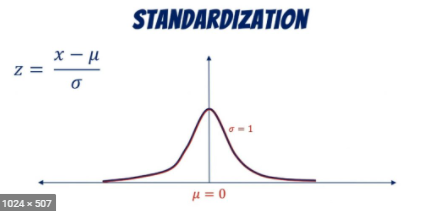

z = (x - mean(x) / standard deviation(x))
Lembrando que o desvio padrão é a raiz quatrada da variação. Podemos imaginar que desvio padrão é a variação de um X em relação ele mesmo.

no caso da standardization os valores iram ficar entre +3 e -3 desvios padrões. Já na normalização, os valore ficaram entre 0-1

Normalization

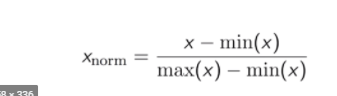

Quando usar standardisation ou usar normalisation?

Normalização é recomendada quando vc tem uma distrubuição normal
da maioria das features, já a standardisation sempre funciona.
Se vc n tiver completamente ctz que segue dist. normal, use logo a standardisation.
Ambas as técnicas vão melhorar o treinamento do modelo


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Não usar padronização/normalização em dados processados pelo label encode e nem o hot one code (dummy). Não é realmente uma regra, mas geralmente piora os resultados ou não melhoram.

In [26]:
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
print(X_train)

[[0.0 1.0 0.0 0.26306757317135365 0.12381478548381812]
 [1.0 0.0 0.0 -0.2535014796014863 0.4617563176278852]
 [0.0 0.0 1.0 -1.9753983221776197 -1.5309334063940299]
 [0.0 0.0 1.0 0.05261351463427087 -1.111419780284153]
 [1.0 0.0 0.0 1.6405850472322603 1.7202971959575157]
 [0.0 0.0 1.0 -0.08131179534387296 -0.16751412153693002]
 [1.0 0.0 0.0 0.9518263102018071 0.9861483502652313]
 [1.0 0.0 0.0 -0.5978808481167129 -0.48214934111933766]]


In [27]:
X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])
print(X_test)

[[0.0 1.0 0.0 -1.0 -1.0]
 [0.0 1.0 0.0 1.0 1.0]]
